#GameSeeker – A Personalized Game Recommendation Engine

### Table of Contents

[Introduction](#Introduction)

[Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))

[Preprocessing](#Preprocessing)

[Advanced EDA](#Advanced-EDA)

[Modeling](#Modeling)

[Evaluation](#\Evaluation)

[Analysis and Conclusion](#Analysis-and-Conclusion)

# Introduction

The Game Recommendation System project aims to create a personalized recommendation engine for digital video game marketplaces like Steam, Epic Games Store, and PlayStation Store. With millions of games available, it’s difficult for players to discover games that match their unique preferences. The goal of this project is to build a recommendation system that goes beyond popularity-based suggestions, offering personalized recommendations tailored to each player’s preferences, such as art style, story, gameplay mechanics, and challenge level.

This project will explore and analyze user behavior data, apply data science techniques like collaborative filtering and content-based filtering, and use machine learning to recommend games.

##  Problem Area

With the increasing number of games on digital marketplaces, recommending the right game to the right player has become a challenge. Current recommendation systems often suggest the most popular games, overlooking niche or lesser-known titles that might be a better fit for the player.

- Users: Often overwhelmed by the number of games.
- Developers: Struggle to reach their target audience, especially indie developers.
- Platforms: Face difficulties in increasing user engagement and driving sales for lesser-known games.


#### Problem with the Current Approach:

Top 20 Popular Games: Ranking games based on popularity or user count can lead to a selection of games that don't necessarily match the unique interests of every player. For example: A player who enjoys a specific genre (like strategy or indie games) might not find relevant games in the top-ranked popular titles. Why it's not enough: While the top 20 most popular games provide a starting point, they don’t account for factors like art style, story, gameplay mechanics, or challenge level that are key to individual preferences.



#### Why the Recommendation System is Needed:

A personalized recommendation system will solve this by using data such as user behavior, ratings, and game features to recommend titles that match the individual’s tastes, increasing player satisfaction and engagement.

In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [350]:
# Load the datasets
steam_200k = pd.read_csv('/Users/keerfeng/Downloads/Sprint0-Keer Feng 2/steam-200k.csv')
sales = pd.read_csv('/Users/keerfeng/Downloads/Sprint0-Keer Feng 2/Video_Games_Sales_as_at_22_Dec_2016.csv')
steamspy = pd.read_excel('/Users/keerfeng/Downloads/Sprint0-Keer Feng 2/SteamSpy - All the data and stats about Steam games.xlsx')

# Steam-200k Data Dictionary

| **Column Name** | **Description** | **Data Type** |
|:---|:---|:---|
| `user id` | Unique identifier for each Steam user |  int64 |
| `Name` | Name of the game played by the user | object |
| `purchase` | Indicates whether the user purchased the game ("purchase" or just "play") | object |
| `hours` | Number of hours the user spent playing the game | float64 |
| `0` | Placeholder or redundant column (needs to be dropped) | int64 |

# Video Games Sales Data Dictionary

| **Column Name** | **Description** | **Data Type** |
|:---|:---|:---|
| `Name` | Name of the video game | object |
| `Platform` | Platform on which the game was released (e.g., PS4, Xbox) | object |
| `Year_of_Release` | Year when the game was released | float64 |
| `Genre` | Genre category of the game (e.g., Action, Adventure) | object |
| `Publisher` | Company that published the game | object |
| `NA_Sales` | Sales in North America (in millions) | float64 |
| `EU_Sales` | Sales in Europe (in millions) | float64 |
| `JP_Sales` | Sales in Japan (in millions) | float64 |
| `Other_Sales` | Sales in other regions (in millions) | float64 |
| `Global_Sales` | Total global sales (in millions) | float64 |
| `Critic_Score` | Aggregate critic review score (0–100 scale) | float64 |
| `Critic_Count` | Number of critic reviews counted | float64 |
| `User_Score` | Average user review score (0–10 scale) | float64 |
| `User_Count` | Number of user reviews counted | float64 |
| `Developer` | Company that developed the game | object |
| `Rating` | ESRB rating indicating the appropriate player age group (e.g., E, M, T) | object |

# SteamSpy Data Dictionary

| **Column Name** | **Description** | **Data Type** |
|:---|:---|:---|
| `#` | Row identifier number | int64 |
| `Game` | Name of the game on Steam | object |
| `Release date` | Date when the game was released on Steam | object |
| `Price` | Price of the game in USD (may include 'free') | object (needs conversion to float) |
| `Score rank(Userscore / Metascore)` | Ratio between User Score and Meta Critic Score (text format) | object |
| `Owners` | Estimated number of game owners | object |
| `Playtime (Median)` | Median playtime for owners (in minutes) | object(needs conversion to float) |
| `Developer(s)` | Developer(s) of the game | object |
| `Publisher(s)` | Publisher(s) of the game | object |
| `Genre` | Genre category of the game | object |

# Exploratory Data Analysis (EDA)

#### 1. Data Overview

In [354]:
steam_200k.dtypes

user id       int64
Name         object
purchase     object
hours       float64
0             int64
dtype: object

In [355]:
sales.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [356]:
steamspy.dtypes

#                                     int64
Game                                 object
Release date                         object
Price                                object
Score rank(Userscore / Metascore)    object
Owners                               object
Playtime (Median)                    object
Developer(s)                         object
Publisher(s)                         object
Genre                                object
dtype: object

In [357]:
# Print basic info about each dataset
print("Steam-200k shape:", steam_200k.shape)
print("Sales shape:", sales.shape)
print("SteamSpy shape:", steamspy.shape)

print("\nSteam-200k columns:", steam_200k.columns.tolist())
print("Sales columns:", sales.columns.tolist())
print("SteamSpy columns:", steamspy.columns.tolist())

Steam-200k shape: (200000, 5)
Sales shape: (16719, 16)
SteamSpy shape: (209963, 10)

Steam-200k columns: ['user id', 'Name', 'purchase', 'hours', '0']
Sales columns: ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']
SteamSpy columns: ['#', 'Game', 'Release date', 'Price', 'Score rank(Userscore / Metascore)', 'Owners', 'Playtime (Median)', 'Developer(s)', 'Publisher(s)', 'Genre']


steam_200k is user-level interaction data → useful for modeling user preferences and behavior.

sales is aggregate game-level data → important for understanding commercial success factors.

steamspy is also game-level, but more focused on ownership, playtime, and pricing, which can help estimate engagement and monetization potential.

In [359]:
# Show a preview of each dataset
steam_200k.head()

,user id,Name,purchase,hours,0
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [360]:
sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [361]:
steamspy.head()

,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,Playtime (Median),Developer(s),Publisher(s),Genre
0,63,Dota 2,"Jul 9, 2013",Free,N/A (N/A/90%),"200,000,000 .. 500,000,000",22:47 (11:16),Valve,Valve,Action
1,385,Counter-Strike: Global Offensive,"Aug 21, 2012",Free,N/A (N/A/83%),"100,000,000 .. 200,000,000",12:25 (05:28),Valve,Valve,Action
2,4,Grand Theft Auto V,"Apr 14, 2015",29.98,N/A (N/A/96%),"50,000,000 .. 100,000,000",11:26 (03:14),Rockstar North,Rockstar Games,Action
3,121,Apex Legends,"Nov 4, 2020",Free,N/A (N/A/88%),"50,000,000 .. 100,000,000",09:57 (03:00),Respawn,Electronic Arts,Action
4,4184,Unturned,"Jul 7, 2017",Free,N/A (N/A),"50,000,000 .. 100,000,000",43:28 (45:04),Smartly Dressed Games,Smartly Dressed Games,Action


#### 2. Data Quality Assessment Check for Missing Values and Duplicates

In [363]:
# 2.1 Checking Duplicate Columns
def check_duplicate_columns(df, df_name):
    duplicate_cols = []
    cols = df.columns
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            if df[cols[i]].equals(df[cols[j]]):
                duplicate_cols.append((cols[i], cols[j]))
    if duplicate_cols:
        print(f"\nDuplicate columns found in {df_name}: {duplicate_cols}")
    else:
        print(f"\nNo duplicate columns found in {df_name}.")

# Check for duplicate columns in each dataset
check_duplicate_columns(steam_200k, "Steam-200k")
check_duplicate_columns(sales, "Sales")
check_duplicate_columns(steamspy, "SteamSpy")


No duplicate columns found in Steam-200k.

No duplicate columns found in Sales.

No duplicate columns found in SteamSpy.


In [364]:
# 2.2 Missing Values
#  1. Identify columns with missing values
missing_cols_steam_200k = steam_200k.columns[steam_200k.isnull().any()]
missing_cols_sales = sales.columns[sales.isnull().any()]
missing_cols_steamspy = steamspy.columns[steamspy.isnull().any()]

print("Missing columns in steam_200k:", missing_cols_steam_200k)
print("Missing columns in sales:", missing_cols_sales)
print("Missing columns in steamspy:", missing_cols_steamspy)

Missing columns in steam_200k: Index([], dtype='object')
Missing columns in sales: Index(['Name', 'Year_of_Release', 'Genre', 'Publisher', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')
Missing columns in steamspy: Index(['Game', 'Release date', 'Price', 'Developer(s)', 'Publisher(s)'], dtype='object')


No missing values were found in steam_200k, simplifying downstream processing. However, both sales and steamspy datasets show missing values across critical metadata columns (e.g., Name, Genre, Release Date, Price), suggesting the need for careful handling during preprocessing, especially to avoid issues when merging datasets.

In [366]:
def print_missing_percentage(df, df_name):
    missing_perc = df.isnull().mean() * 100
    print(f"\nMissing value percentages for {df_name}:")
    print(missing_perc)

print_missing_percentage(steam_200k, "Steam-200k")
print_missing_percentage(sales, "Sales")
print_missing_percentage(steamspy, "SteamSpy")


Missing value percentages for Steam-200k:
user id     0.0
Name        0.0
purchase    0.0
hours       0.0
0           0.0
dtype: float64

Missing value percentages for Sales:
Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         54.602548
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64

Missing value percentages for SteamSpy:
#                                    0.000000
Game                                 0.002858
Release date                         0.005239
Price                                4.711783
Score rank(Userscore / Metascore)    0.000000
Owners                               0.000000
Playtime (Median)           

Steam-200k Dataset:

- All columns have 0.0% missing values.

- This confirms that the user interaction data is complete, and no missing value handling is required for this dataset.

Sales Dataset:

- Columns like Critic_Score, Critic_Count, User_Score, and User_Count have over 50% missingness, which may render them unreliable for modeling without heavy imputation or careful handling.

- Metadata fields such as Name and Genre have minimal missingness and are generally usable after simple cleaning.

SteamSpy Dataset:

- The SteamSpy dataset is relatively clean compared to the Sales dataset.

- Missing values in important identifier fields such as Game should be addressed carefully.

- Minor missingness in fields like Price and Release date can be handled either by dropping a few rows or simple imputation if necessary.


In [368]:
# 2. Analyze distribution for each missing column
import matplotlib.pyplot as plt

def explore_missing_columns_all_in_one(df, missing_cols, df_name):
    numeric_cols = [col for col in missing_cols if df[col].dtype in ['int64', 'float64']]
    categorical_cols = [col for col in missing_cols if df[col].dtype == 'object']

    # Plot numeric columns
    if numeric_cols:
        n_cols = 2  # number of plots per row
        n_rows = (len(numeric_cols) + 1) // n_cols
        plt.figure(figsize=(n_cols * 6, n_rows * 4))
        for idx, col in enumerate(numeric_cols, 1):
            plt.subplot(n_rows, n_cols, idx)
            df[col].hist(bins=30)
            plt.title(f"Histogram of {col}")
            plt.xlabel(col)
            plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

In [369]:
# steam_200k
explore_missing_columns_all_in_one(steam_200k, missing_cols_steam_200k, "steam_200k")

No missing values in "steam_200k", thus, no data showed.

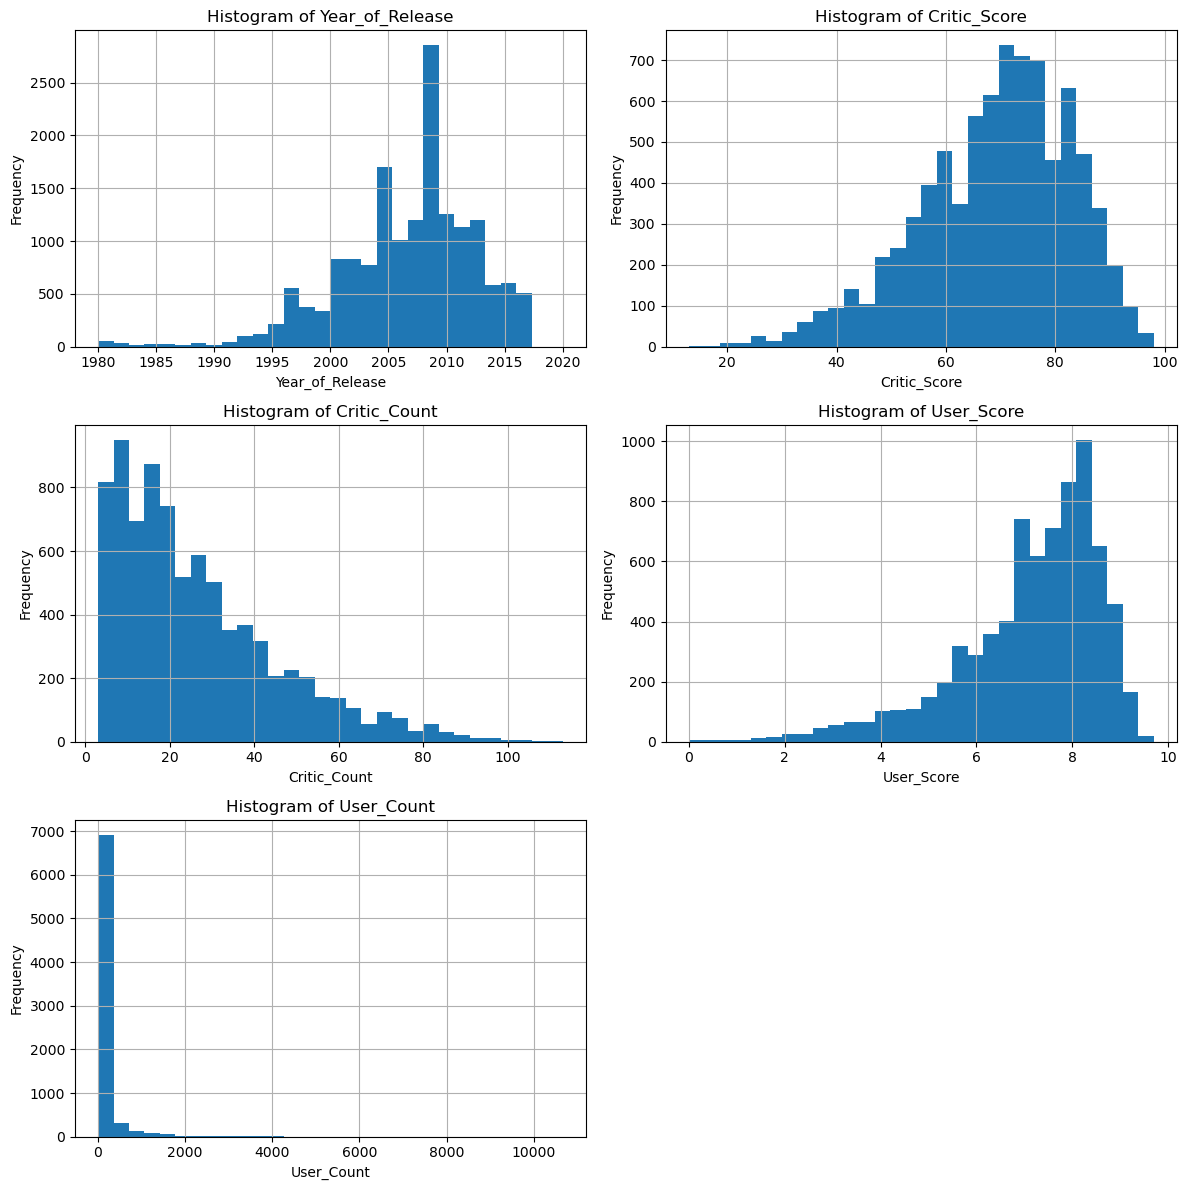

In [371]:
# sales
explore_missing_columns_all_in_one(sales, missing_cols_sales, "sales")

In [372]:
explore_missing_columns_all_in_one(steamspy, missing_cols_steamspy, "steamspy")

In [373]:
import matplotlib.pyplot as plt

def explore_missing_columns_all_in_one(df, missing_cols, df_name):
    numeric_cols = [col for col in missing_cols if df[col].dtype in ['int64', 'float64']]
    categorical_cols = [col for col in missing_cols if df[col].dtype == 'object']

     # Print categorical columns
    for col in categorical_cols:
        print(f"\nTop categories for {col}:")
        print(df[col].value_counts(dropna=False))

In [374]:
explore_missing_columns_all_in_one(steam_200k, missing_cols_steam_200k, "steam_200k")

In [375]:
explore_missing_columns_all_in_one(sales, missing_cols_sales, "sales")


Top categories for Name:
Name
Need for Speed: Most Wanted                         12
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
Ratatouille                                          9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: count, Length: 11563, dtype: int64

Top categories for Genre:
Genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
NaN                2
Name: count, dtyp

In [376]:
explore_missing_columns_all_in_one(steamspy, missing_cols_steamspy, "steamspy")


Top categories for Game:
Game
Rust                                    11
Book of Yog Idle RPG                    10
Firestone Idle RPG                      10
Galaxy Citizen                           9
★ Fallalypse ★                           9
                                        ..
Aquadelic GT                             1
Aquascapers                              1
FIVE NIGHTS AT FREDDY'S: HELP WANTED     1
SG/ZH: School Girl/Zombie Hunter         1
NOBUNAGA'S AMBITION: Souzou              1
Name: count, Length: 85976, dtype: int64

Top categories for Release date:
Release date
Oct 31, 2024    308
Dec 5, 2024     276
Oct 25, 2024    274
Oct 24, 2024    269
Oct 23, 2024    255
               ... 
Apr 11, 2008      1
May 1, 2003       1
May 28, 2012      1
Mar 17, 2011      1
Mar 1, 1997       1
Name: count, Length: 5603, dtype: int64

Top categories for Price:
Price
4.99     22848
9.99     20542
0.99     18281
Free     17706
1.99     14257
         ...  
20.74        1
2.58      

### `steam_200k` Dataset

- **No missing columns were found**, which is why:
  - No histograms or bar charts were generated,
  - The function `explore_missing_columns_all_in_one()` did not return any output for this dataset.
-  This indicates the dataset has already been cleaned or has complete entries for all features.


### `sales` Dataset

#### Numeric Columns

**1. `Year_of_Release`**  
- Distribution is centered around 2010–2013.  
- A few outliers exist before 1990 and after 2015.  
- **Suggested Imputation**: Use the **mode** or **median**, since the data is discrete and only slightly skewed.

**2. `Critic_Score`**  
- Fairly normal bell-shaped distribution centered around 70–80.  
- **Suggested Imputation**: **Mean** or **median** are both appropriate.

**3. `Critic_Count`**  
- Right-skewed with long tail.  
- **Suggested Imputation**: **Median**, to avoid influence from large outliers.

**4. `User_Score`**  
- Slight right skew, peaking around 8–9.  
- **Suggested Imputation**: **Median** is preferred.

**5. `User_Count`**  
- Extremely right-skewed with most values near zero.  
- **Suggested Imputation**: **Median** to minimize outlier impact.

---

#### Categorical Columns

**6. `Name`**  
- High cardinality (11,563 unique).  
- **No missing values** detected. No action needed.

**7. `Genre`**  
- Most common: `Action`, `Sports`, `Misc`.  
- **Missing**: 2 entries.  
- **Suggested Imputation**: **Mode** (`Action`), since the number of missing entries is very small.

**8. `Publisher`**  
- Many categories, top is `Electronic Arts`.  
- **Few missing values**.  
- **Suggested Imputation**: Mode or create `"Unknown"` if missing entries are too ambiguous.

**9. `Developer`**  
- **Over 6,000 missing entries** (more than half).  
- **Suggested Imputation**: Fill with `"Unknown"` or `"Not Disclosed"` to maintain transparency.

**10. `Rating`**  
- **6,769 missing entries** (very high).  
- **Suggested Imputation**: `"Not Rated"` or `"Missing"` to avoid assumption.

---


###  `steamspy` Dataset

####  No numeric columns with missing values

- The `explore_missing_columns_all_in_one()` function did not display any histograms.
- This is because **none of the numeric columns have missing values**.
- Only categorical columns with missing data were detected — shown below with analysis.

---

#### Categorical Columns

**1. `Game`**  
- Very high cardinality: over 85,000 unique titles.  
- No missing values reported.  
- **Action**: No imputation needed.

---

**2. `Release date`**  
- Many unique entries (5,600+), but format might be inconsistent (e.g. `Oct 31, 2024`).  
- No missing values reported.  
- **Action**: Consider parsing into `datetime` format for further analysis. No imputation needed.

---

**3. `Price`**  
- 635 unique values, most common: `4.99`, `9.99`, `0.99`, `Free`.  
- No missing values shown, but worth verifying if "Free" is truly categorical or a string.  
- **Action**: If type is string and mixed with floats, consider standardizing. No imputation needed.

---

**4. `Developer(s)`**  
- 54,000+ unique values. No missing values shown.  
- **Action**: None required, though high uniqueness makes it less useful for modeling without grouping.

---

**5. `Publisher(s)`**  
- **575 missing entries** detected.  
- Large diversity of publishers (47,000+).  
- **Suggested Imputation**:  
  - If modeling/predicting: use `"Unknown"` or `"Not Disclosed"`.  
  - If not crucial: optionally drop or exclude for analysis.

### Summary Observation & Analysis of Missing Value Distributions

---

### `steam_200k`

**Observation**:  
- No missing values were found in this dataset.

**Analysis**:  
- This suggests the dataset is already cleaned or includes only essential fields.
- No imputation is necessary.

---

### `sales`

**Observation**:  
- Contains missing values in both **numeric** and **categorical** columns.
- Missingness is moderate to high in some columns.

**Analysis**:

**Numeric Columns:**
- `Year_of_Release`: Discrete, slightly skewed → **Mode** or **Median** recommended.
- `Critic_Score`, `User_Score`: Normal to slightly skewed → **Mean** or **Median**.
- `Critic_Count`, `User_Count`: Heavily skewed → **Median** is safest.

**Categorical Columns:**
- `Genre`, `Publisher`: Few missing values → **Fill with mode**.
- `Developer` (6,623 missing) and `Rating` (6,769 missing):  
  → **Fill with `"Unknown"` or `"Not Rated"` or `"Try to predict Rating based on other features like Genre or Publisher"`** to maintain transparency.
- `Name`: Complete but high-cardinality — should be retained with care to avoid overfitting.

---

### `steamspy`

**Observation**:  
- All missing data occurs in **categorical** columns.
- No missing numeric columns — therefore, no histograms were plotted.

**Analysis**:

- `Publisher(s)` has 575 missing values → **Fill with `"Unknown"`** or `"Not Disclosed"`.
- `Game`, `Developer(s)`, `Release date`, and `Price` are complete:
  - `Game`: High-cardinality — usable but should be encoded with caution.
  - `Release date`: Consider converting to datetime for better usability or fill with `"Unknown"`
  - `Price`: Mix of values like `"Free"` and float prices — consider standardizing format to numeric.
  - `Developer(s)` and `Publisher(s)`: Large number of unique entries — grouping top categories or using `"Unknown"` can help reduce dimensionality.

After analyzing the distribution of missing columns, I chose imputation methods that respect the nature of each feature. For numeric fields, median or mean imputation was selected depending on skewness. For categorical fields, mode imputation was applied where missingness was low, and explicit placeholders such as 'Unknown' were used for features with significant missingness to maintain transparency without introducing bias. KNN imputation was avoided based on the distributional analysis and the instructor’s suggestion.

# Preprocessing

## Handling the Missing Values

In [384]:
# ---- For sales ----

# Numeric columns
# Year_of_Release is discrete → use mode
year_mode = sales['Year_of_Release'].mode()[0]
sales['Year_of_Release'] = sales['Year_of_Release'].fillna(year_mode)

# Critic_Score is fairly normal → use mean
critic_score_mean = sales['Critic_Score'].mean()
sales['Critic_Score'] = sales['Critic_Score'].fillna(critic_score_mean)

# Critic_Count is skewed → use median
critic_count_median = sales['Critic_Count'].median()
sales['Critic_Count'] = sales['Critic_Count'].fillna(critic_count_median)

# User_Score is slightly skewed → use mean
user_score_mean = sales['User_Score'].mean()
sales['User_Score'] = sales['User_Score'].fillna(user_score_mean)

# User_Count is heavily skewed → use median
user_count_median = sales['User_Count'].median()
sales['User_Count'] = sales['User_Count'].fillna(user_count_median)

In [385]:
# Categorical columns
# Genre: small missing → fill with mode
genre_mode = sales['Genre'].mode()[0]
sales['Genre'] = sales['Genre'].fillna(genre_mode)

# Publisher: small missing → fill with mode
publisher_mode = sales['Publisher'].mode()[0]
sales['Publisher'] = sales['Publisher'].fillna(publisher_mode)

# Name: small missing → fill with 'Unknown'
sales['Name'] = sales['Name'].fillna('Unknown')

# Developer: large missing → fill with 'Unknown'
sales['Developer'] = sales['Developer'].fillna('Unknown')

# Rating: large missing → fill with 'Not Rated'
sales['Rating'] = sales['Rating'].fillna('Not Rated')


# ---- For steam_200k ----

# No missing values found — no action needed

In [386]:
# ---- For steamspy ----

# Publisher: large missing → fill with 'Unknown'
steamspy['Publisher(s)'] = steamspy['Publisher(s)'].fillna('Unknown')

# Price: 
# Replace 'free' with 0
steamspy['Price'] = steamspy['Price'].replace('Free', 0)

# Convert the column to float
steamspy['Price'] = steamspy['Price'].astype(float)

/var/folders/k5/pgx8dcnn4090nkjd49698msh0000gn/T/ipykernel_1286/1277026073.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  steamspy['Price'] = steamspy['Price'].replace('Free', 0)


In [387]:
print(steamspy['Price'].dtypes)

float64


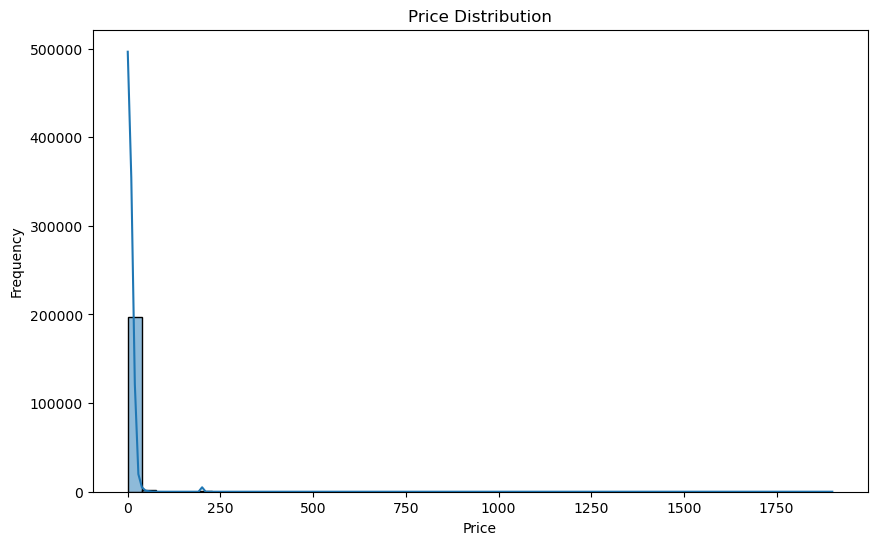

In [388]:
plt.figure(figsize=(10,6))
sns.histplot(steamspy['Price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Because the distribution is extremely skewed, it should definitely used the median to fill missing prices.

- Can not use mean — because the mean would be pulled upward unfairly by the very few $500+ games.

In [390]:
# Fill missing Price values with median
steamspy['Price'] = steamspy['Price'].fillna(steamspy['Price'].median())

In [391]:
# Fill missing 'Game' with 'Unknown'
steamspy['Game'] = steamspy['Game'].fillna('Unknown')

# Fill missing 'Release date' with mode 
release_date_mode = steamspy['Release date'].mode()[0]
steamspy['Release date'] = steamspy['Release date'].fillna(release_date_mode)

# Fill missing 'Price' with the median value
steamspy['Price'] = steamspy['Price'].fillna(steamspy['Price'].median())

# Fill missing 'Developer(s)' and 'Publisher(s)' with 'Unknown'
steamspy['Developer(s)'] = steamspy['Developer(s)'].fillna('Unknown')
steamspy['Publisher(s)'] = steamspy['Publisher(s)'].fillna('Unknown')

In [392]:
# Check number of missing values per column
print(sales.isnull().sum())

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64


In [393]:
print(steamspy.isnull().sum())

#                                    0
Game                                 0
Release date                         0
Price                                0
Score rank(Userscore / Metascore)    0
Owners                               0
Playtime (Median)                    0
Developer(s)                         0
Publisher(s)                         0
Genre                                0
dtype: int64


In [394]:
print(steam_200k.isnull().sum())

user id     0
Name        0
purchase    0
hours       0
0           0
dtype: int64


### Merging the Three Sheets


In [396]:
# 1. Standardize the "Name" column in steam_200k
steam_200k['Name'] = steam_200k['Name'].str.strip().str.lower()

# 2. Standardize the "Name" column in sales
sales['Name'] = sales['Name'].str.strip().str.lower()

# 3. Standardize the "Game" column in steamspy
steamspy['Game'] = steamspy['Game'].str.strip().str.lower()

# 4. Rename columns to align before merging
# Since steamspy already uses "Game", rename the others
steam_200k = steam_200k.rename(columns={'Name': 'Game'})
sales = sales.rename(columns={'Name': 'Game'})

Standardizing game names and aligning column names are critical preprocessing steps to ensure that when datasets are merged:

Games are correctly matched across datasets.

No records are accidentally lost due to small textual inconsistencies.

Merging behavior is predictable and reliable.

Without these steps, the merged dataset would suffer from partial matches, missing entries, and significantly reduced data quality, directly impacting downstream analysis and model performance.

In [398]:
# Pre-aggregate steam_200k by Game
steam_agg = steam_200k.groupby('Game').agg({
    'user id': 'nunique',  # unique players
    'hours': 'mean',       # average play time
    'purchase': lambda x: (x == 'purchase').mean()  # % who purchased
}).reset_index()

# Rename columns for clarity
steam_agg = steam_agg.rename(columns={
    'user id': 'unique_users',
    'hours': 'avg_hours',
    'purchase': 'purchase_ratio'
})

Before merging the three datasets, the steam_200k user-level dataset was aggregated at the game level to align with the structure of the sales and steamspy datasets. The aggregation computed the number of unique users, the average playtime per user, and the purchase ratio for each game. This step ensured a clean, one-row-per-game structure for seamless merging and meaningful feature integration.

In [400]:
# First merge sales and steam_200k
sales_steam_merged = pd.merge(sales, steam_200k, how='inner', on='Game')

print("After merging sales + steam_200k:", sales_steam_merged.shape)
sales_steam_merged.head()

After merging sales + steam_200k: (93767, 20)


,Game,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,user id,purchase,hours,0
0,grand theft auto v,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M,53875128,purchase,1.0,0
1,grand theft auto v,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M,53875128,play,86.0,0
2,grand theft auto v,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M,11373749,purchase,1.0,0
3,grand theft auto v,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M,11373749,play,61.0,0
4,grand theft auto v,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M,263856756,purchase,1.0,0


In [401]:
df = pd.merge(sales_steam_merged, steamspy, how='inner', on='Game')

print("Final merged:", df.shape)
df.head()

Final merged: (149435, 29)


,Game,Platform,Year_of_Release,Genre_x,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,0,#,Release date,Price,Score rank(Userscore / Metascore),Owners,Playtime (Median),Developer(s),Publisher(s),Genre_y
0,grand theft auto v,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,...,0,4,"Apr 14, 2015",29.98,N/A (N/A/96%),"50,000,000 .. 100,000,000",11:26 (03:14),Rockstar North,Rockstar Games,Action
1,grand theft auto v,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,...,0,2,"Apr 14, 2015",29.98,N/A (N/A/96%),"50,000,000 .. 100,000,000",07:07 (01:29),Rockstar North,Rockstar Games,Adventure
2,grand theft auto v,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,...,0,4,"Apr 14, 2015",29.98,N/A (N/A/96%),"50,000,000 .. 100,000,000",11:26 (03:14),Rockstar North,Rockstar Games,Action
3,grand theft auto v,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,...,0,2,"Apr 14, 2015",29.98,N/A (N/A/96%),"50,000,000 .. 100,000,000",07:07 (01:29),Rockstar North,Rockstar Games,Adventure
4,grand theft auto v,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,...,0,4,"Apr 14, 2015",29.98,N/A (N/A/96%),"50,000,000 .. 100,000,000",11:26 (03:14),Rockstar North,Rockstar Games,Action


In [402]:
# Check merged dataset shape
print("Number of rows (user-game interactions):", df.shape[0])
print("Number of unique games:", df['Game'].nunique())

Number of rows (user-game interactions): 149435
Number of unique games: 301


State:

After merging the three datasets (sales, steam_200k, steamspy), the final dataset contains approximately 149,000 user-game interactions across 301 unique games.

Comment:

Although the number of games is relatively small compared to larger gaming marketplaces, the volume of interactions is sufficient for training personalized recommendation models. This setup reflects a realistic small-to-medium-sized gaming platform.

In [404]:
df.isnull().sum()

Game                                 0
Platform                             0
Year_of_Release                      0
Genre_x                              0
Publisher                            0
NA_Sales                             0
EU_Sales                             0
JP_Sales                             0
Other_Sales                          0
Global_Sales                         0
Critic_Score                         0
Critic_Count                         0
User_Score                           0
User_Count                           0
Developer                            0
Rating                               0
user id                              0
purchase                             0
hours                                0
0                                    0
#                                    0
Release date                         0
Price                                0
Score rank(Userscore / Metascore)    0
Owners                               0
Playtime (Median)        

In [405]:
# Create purchase flag
df['purchase'] = df['purchase'].apply(lambda x: 1 if x == 'purchase' else 0)

In [406]:
# Quick check
df.head()

,Game,Platform,Year_of_Release,Genre_x,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,0,#,Release date,Price,Score rank(Userscore / Metascore),Owners,Playtime (Median),Developer(s),Publisher(s),Genre_y
0,grand theft auto v,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,...,0,4,"Apr 14, 2015",29.98,N/A (N/A/96%),"50,000,000 .. 100,000,000",11:26 (03:14),Rockstar North,Rockstar Games,Action
1,grand theft auto v,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,...,0,2,"Apr 14, 2015",29.98,N/A (N/A/96%),"50,000,000 .. 100,000,000",07:07 (01:29),Rockstar North,Rockstar Games,Adventure
2,grand theft auto v,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,...,0,4,"Apr 14, 2015",29.98,N/A (N/A/96%),"50,000,000 .. 100,000,000",11:26 (03:14),Rockstar North,Rockstar Games,Action
3,grand theft auto v,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,...,0,2,"Apr 14, 2015",29.98,N/A (N/A/96%),"50,000,000 .. 100,000,000",07:07 (01:29),Rockstar North,Rockstar Games,Adventure
4,grand theft auto v,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,...,0,4,"Apr 14, 2015",29.98,N/A (N/A/96%),"50,000,000 .. 100,000,000",11:26 (03:14),Rockstar North,Rockstar Games,Action


This merged dataset successfully captures both user behavior (purchase, playtime) and game features (genre, developer, publisher, price).

It is well-structured for both collaborative filtering and simple predictive modeling (e.g., logistic regression).

# Advanced EDA

After successfully merging the sales, Steam 200k, and SteamSpy datasets, we obtained a comprehensive user-game interaction dataset consisting of approximately 140,000 records across 301 unique games.

This advanced EDA aims to dive deeper into understanding the patterns and relationships within the merged data, focusing on:

- User interaction behavior (playtime, purchases)
- Game-level features (price, genre, developer, publisher)
- Purchase tendencies across different game types
- Correlation between key numeric features (e.g., hours played, price, interaction score)

Through this exploration, we seek to uncover insights that will guide feature engineering decisions and inform the development of more effective recommendation models in Sprint 3.

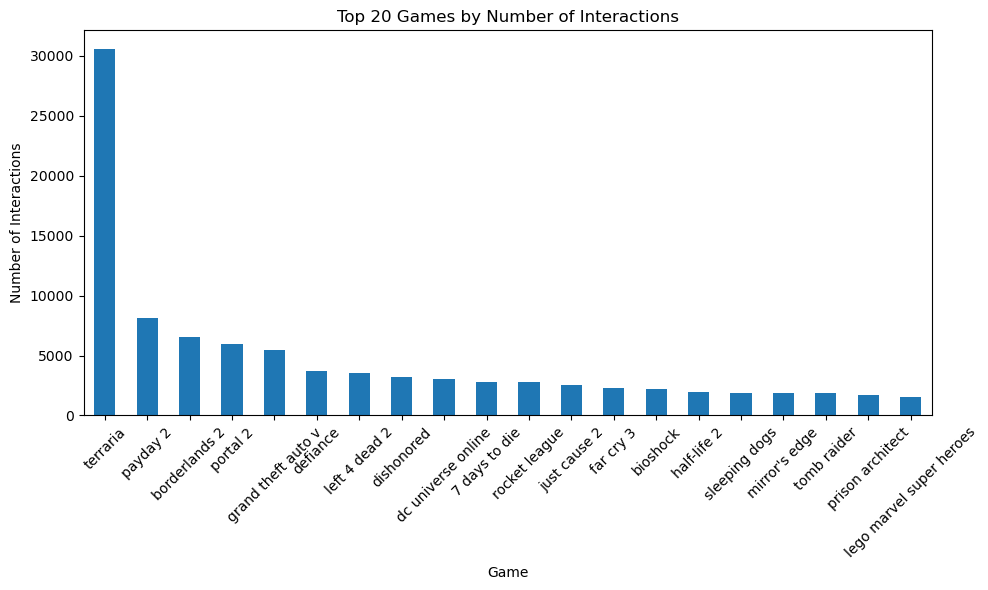

In [410]:
import matplotlib.pyplot as plt

game_interactions = df['Game'].value_counts()
plt.figure(figsize=(10,6))
game_interactions.head(20).plot(kind='bar')
plt.title('Top 20 Games by Number of Interactions')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()       # Adjust layout so labels don't get cut off
plt.show()

### Observation:

- Terraria is by far the most interacted game, with over 30,000 interactions, significantly higher than any other title.

- The next few games — Payday 2, Borderlands 2, and Portal 2 — have between 5,000 and 8,000 interactions each.

- Other popular games include familiar names like Grand Theft Auto V, Rocket League, and Bioshock.

- There is a sharp drop in the number of interactions after the first few games, showing a long-tail distribution.

- Most games ranked 10th–20th have between 1,500 and 3,000 interactions, much lower than the top few games.

### Conclusing:

The interaction data shows strong concentration of user activity around a few highly popular games,
highlighting the need for hybrid recommendation approaches that combine popularity signals with game content features to better serve all users.

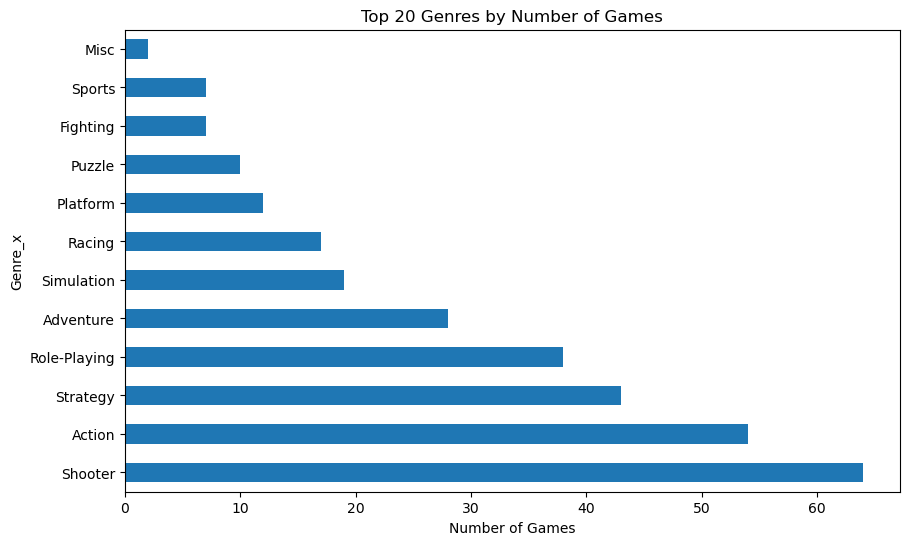

In [413]:
# Assuming one genre per game
top_genres = df[['Game', 'Genre_x']].drop_duplicates()['Genre_x'].value_counts().head(20)
plt.figure(figsize=(10,6))
top_genres.plot(kind='barh')
plt.title('Top 20 Genres by Number of Games')
plt.xlabel('Number of Games')
plt.show()

### Observations
- The most common game genres are **Shooter** (about 65 games) and **Action** (over 50 games).
- Other popular genres include **Strategy**, **Role-Playing**, and **Adventure**, each contributing a substantial number of games.
- Less frequent genres like **Misc**, **Sports**, and **Fighting** have fewer than 10 games each in the dataset.
- There is a clear imbalance, where a few genres dominate the overall game library.

### Insights
- **Genre Popularity Skew**:
  - Shooter and Action genres are **over-represented** compared to niche genres like Puzzle or Platform.
  - Future modeling must account for genre imbalance to avoid biasing recommendations toward only the most frequent genres.

- **Implications for Recommendation System**:
  - Collaborative filtering approaches might over-recommend Shooter and Action games simply due to their high presence.
  - Content-based filtering and genre diversification strategies could help promote underrepresented genres to maintain user interest and discovery.

- **Opportunities for Future Analysis**:
  - Analyze **purchase rates per genre**: Are Shooter and Action games not only numerous but also more frequently purchased?
  - Examine **user engagement per genre**: Do players spend more time playing certain genres even if they are less common?
  - Consider creating **genre-based features** for future modeling, like "Is Shooter", "Is Strategy", etc.

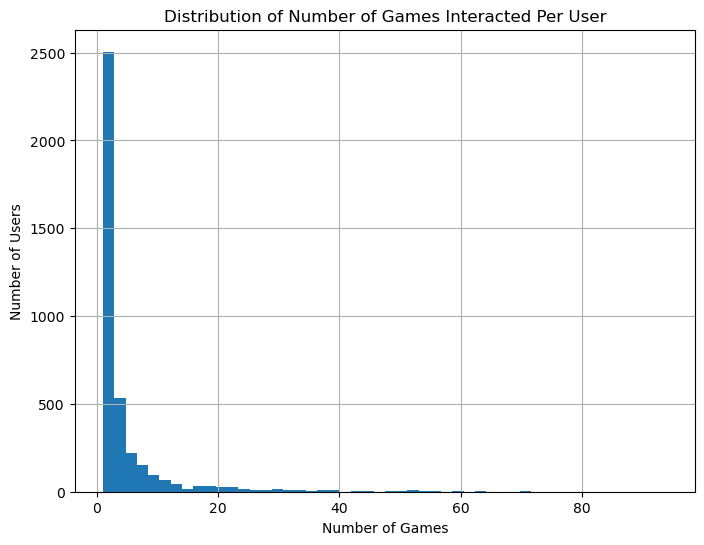

In [415]:
# Number of games each user interacted with
user_interaction_counts = df.groupby('user id')['Game'].nunique()

plt.figure(figsize=(8,6))
user_interaction_counts.hist(bins=50)
plt.title('Distribution of Number of Games Interacted Per User')
plt.xlabel('Number of Games')
plt.ylabel('Number of Users')
plt.show()


### Observations
- Most users interacted with **only 1 or 2 games**.
- A small number of users interacted with **10 to 80 games**, but such users are rare.
- The distribution is highly **right-skewed**, showing a **long-tail pattern**:
  - Many users with minimal engagement
  - A few highly active users with broad interaction histories.

### Analytical Insights
- **Cold Start Risk**:
  - The majority of users have very few interactions, which poses challenges for collaborative filtering models.
  - These users will require **content-based recommendations** or popularity-based fallback strategies.

- **Opportunities for Modeling**:
  - For **highly active users** (those interacting with many games), collaborative filtering can be very effective.
  - A hybrid model combining content-based and collaborative filtering would be ideal to serve both cold-start users and highly engaged users.

- **User Segmentation Possibility**:
  - Users can potentially be segmented based on activity level (e.g., casual vs. hardcore) for better personalization.

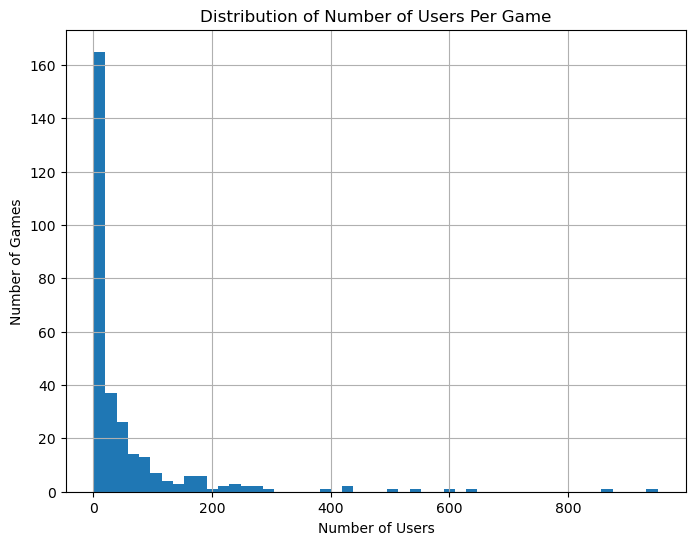

Top 10 most interacted games:
Game
left 4 dead 2                 951
counter-strike                856
half-life 2                   639
sid meier's civilization v    596
portal 2                      544
terraria                      496
borderlands 2                 429
payday 2                      427
half-life                     388
bioshock infinite             296
Name: user id, dtype: int64


In [417]:
# Number of users per game
game_popularity = df.groupby('Game')['user id'].nunique()

plt.figure(figsize=(8,6))
game_popularity.hist(bins=50)
plt.title('Distribution of Number of Users Per Game')
plt.xlabel('Number of Users')
plt.ylabel('Number of Games')
plt.show()

# Most popular games
print("Top 10 most interacted games:")
print(game_popularity.sort_values(ascending=False).head(10))


### Observations
- Most games were interacted with by **fewer than 20 users**.
- A small number of games were interacted with by **hundreds of users**, but these are rare.
- The distribution is highly **right-skewed**, showing a **long-tail pattern**:
  - A few highly popular games dominate user attention.
  - The majority of games have relatively low user engagement.

### Insights
- **Popularity Skew**:
  - A handful of games (such as Terraria, Payday 2) have very high user counts.
  - Most games have limited exposure, being interacted with by only a few users.

- **Impact on Recommendation Systems**:
  - Collaborative filtering models might naturally favor popular games, leading to **popularity bias**.
  - Niche games with fewer interactions may require **content-based filtering** approaches to ensure they are not ignored.

- **Cold Start Problem for Games**:
  - Many games have too little user interaction data for effective collaborative recommendations.
  - For these games, leveraging **game metadata** (genre, developer, price) will be essential.


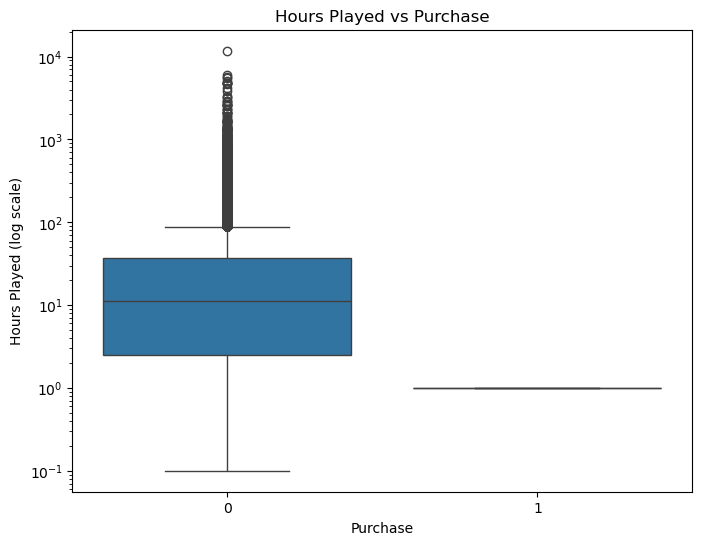

In [419]:
plt.figure(figsize=(8,6))
sns.boxplot(x='purchase', y='hours', data=df)
plt.yscale('log')  # Log scale because playtime has extreme outliers
plt.title('Hours Played vs Purchase')
plt.xlabel('Purchase')
plt.ylabel('Hours Played (log scale)')
plt.show()

### Observations
- Users with `Purchase = 1` typically have very low hours played, around or less than 1 hour.
- Users with `Purchase = 0` have a much wider distribution of hours played, ranging from just a few hours to over 10,000 hours.
- The boxplot for the `Purchase = 1` group is flat and compressed, indicating minimal gameplay variation among quick purchasers.
- The `Purchase = 0` group shows significant outliers, including extremely high gameplay hours.
- The y-axis uses a logarithmic scale to accommodate the extreme range of gameplay hours.

### Insights
- **Quick Purchases with Minimal Engagement**:
  - Users labeled `Purchase = 1` made purchases but barely engaged with the game afterward.
  - This could indicate impulse buys, trial purchases, or games that failed to hold user interest.

- **Normal and Heavy Engagement**:
  - Users labeled `Purchase = 0` show a wide spread of playtime, representing normal to heavy engagement patterns.
  - These users continue playing well beyond initial purchase, suggesting better retention or satisfaction with the game.

- **Gameplay Hours as a Retention Signal**:
  - Hours played after purchase could serve as an important indicator for **user retention** or **game quality**, rather than just purchase behavior.
  - Modeling user satisfaction and retention might benefit from using playtime data.

- **Business Implications**:
  - Publishers could target users with very low early engagement (around 1 hour) for re-engagement campaigns, tutorials, or special offers to encourage deeper involvement.
  - Heavy players (high hours) may be more open to upselling opportunities like DLCs or expansions.

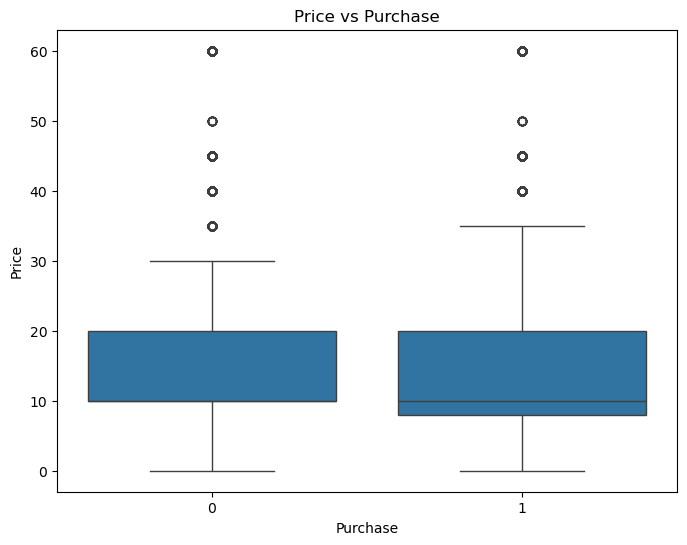

In [421]:
plt.figure(figsize=(8,6))
sns.boxplot(x='purchase', y='Price', data=df)
plt.title('Price vs Purchase')
plt.xlabel('Purchase')
plt.ylabel('Price')
plt.show()

### Observations
- The price distributions for both groups (`Purchase = 0` and `Purchase = 1`) are fairly similar.
- Both groups show a wide price range, from $0 (free games) up to $60 (full-price AAA games).
- Users with `Purchase = 1` tend to purchase slightly **lower-priced games** compared to `Purchase = 0` users:
  - The median price for `Purchase = 1` is slightly lower than the median price for `Purchase = 0`.
- Outliers exist at the high end ($40–$60) for both groups, but are relatively rare.

### Insights
- **Price is a weak differentiator**:
  - There is no dramatic difference in price distributions between users with low playtime and users with high playtime after purchase.
  - This suggests that **price alone** is **not a strong predictor** of post-purchase engagement.

- **Low-Priced Games and Quick Purchases**:
  - Users who quickly drop off after purchase (`Purchase = 1`) are slightly more associated with cheaper games.
  - Possible reasons: impulse buying during sales, experimenting with low-cost games without long-term commitment.

- **High-Priced Games and Engagement**:
  - High-priced games appear in both groups, but the higher median price in the `Purchase = 0` group suggests that users who spend more may be more willing to stay engaged after purchasing.


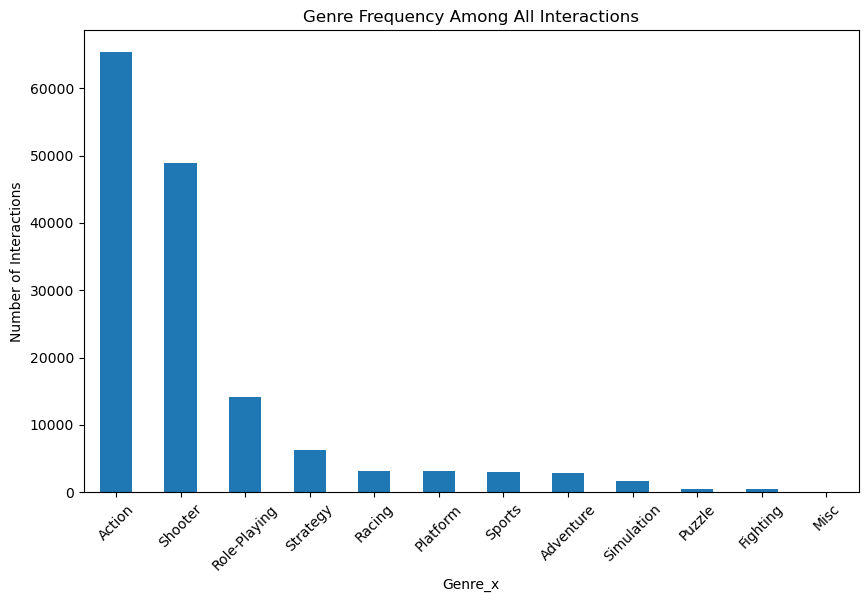

In [423]:
# Genre frequency among all interactions
genre_interactions = df['Genre_x'].value_counts()
plt.figure(figsize=(10,6))
genre_interactions.plot(kind='bar')
plt.title('Genre Frequency Among All Interactions')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()

### Observations
- **Action** and **Shooter** genres dominate the interactions, with Action games having over 65,000 interactions and Shooter games close to 50,000.
- **Role-Playing** and **Strategy** genres follow, but with significantly lower interaction counts (around 15,000 and 6,000 respectively).
- Other genres like **Racing**, **Platform**, **Sports**, and **Adventure** have moderate interaction levels.
- Niche genres such as **Puzzle**, **Fighting**, and **Misc** have very low user interactions.

### Insights
- **Heavy Skew Toward Action and Shooter Genres**:
  - The vast majority of user engagement is concentrated in just a few genres.
  - Recommendation systems based purely on historical interaction data risk heavily biasing towards Action and Shooter games.

- **Opportunities for Diversification**:
  - Lesser-known genres could be promoted to encourage exploration and reduce user fatigue with dominant genres.
  - Genre-based diversity metrics could be integrated into recommendation strategies to balance relevance and variety.

- **Cold Start Risk for Niche Genres**:
  - Puzzle, Fighting, and Misc games have so few interactions that collaborative filtering models may struggle to recommend them.
  - Content-based features (genre, developer, etc.) will be critical to expose users to niche titles.

- **Business Implications**:
  - Marketing campaigns could highlight underrepresented genres to encourage broader engagement.
  - Featuring niche genres during discovery phases (e.g., "New Releases", "Hidden Gems") could drive new user-game matches.


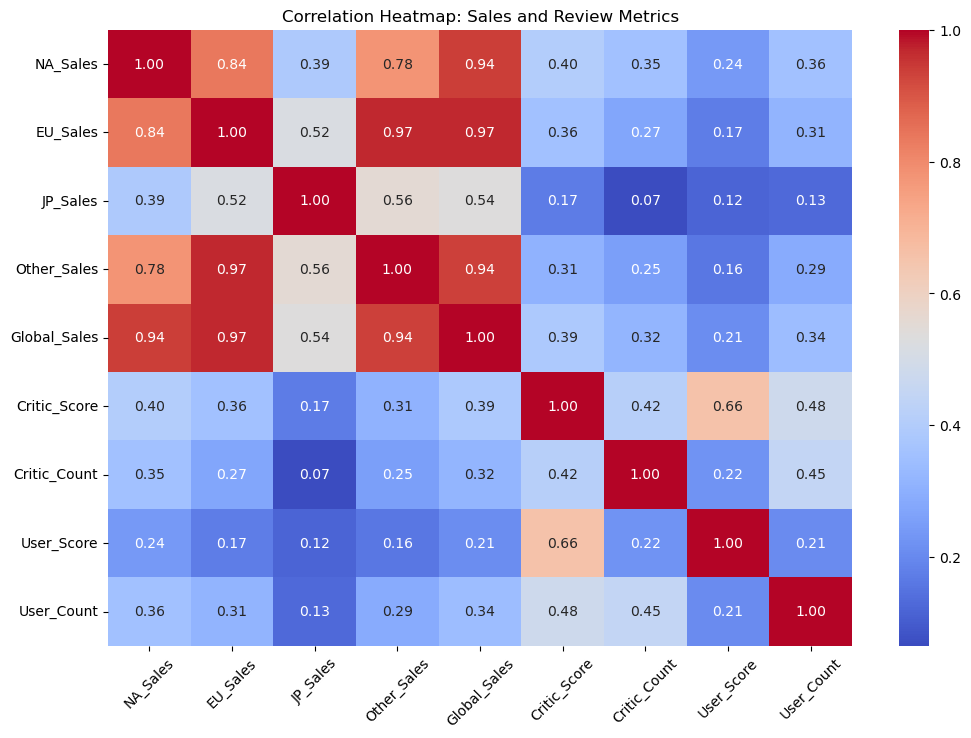

In [425]:
sales_reviews_cols = [
    'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
    'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'
]

plt.figure(figsize=(12,8))
sns.heatmap(df[sales_reviews_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Sales and Review Metrics')
plt.xticks(rotation=45)
plt.show()

### Observations:
- **NA_Sales**, **EU_Sales**, and **Global_Sales** exhibit strong positive correlations (above 0.90), indicating that high sales in one region are closely associated with strong global sales.
- **JP_Sales** shows weaker correlation with other regional sales (around 0.39–0.56), suggesting that Japan's market behavior differs from North American and European markets.
- **Critic_Score** and **User_Score** have a moderate positive correlation (0.66), meaning critics' and users' opinions are somewhat aligned but not identical.
- Overall sales figures have weak correlations with review scores (around 0.30–0.40), implying that critical or user acclaim does not directly predict high sales.
- **Critic_Count** has a moderate positive correlation (around 0.45) with Global_Sales, indicating that games with more critic reviews tend to sell better.

### Analysis:
The strong correlations between regional sales and global sales are expected and confirm the aggregation quality. However, critical and user scores, while moderately correlated with each other, do not strongly influence overall sales. This suggests that other factors such as marketing, franchise strength, or regional preferences have a larger impact on sales performance than review scores alone. Games widely reviewed by critics tend to achieve better sales, possibly due to increased visibility.


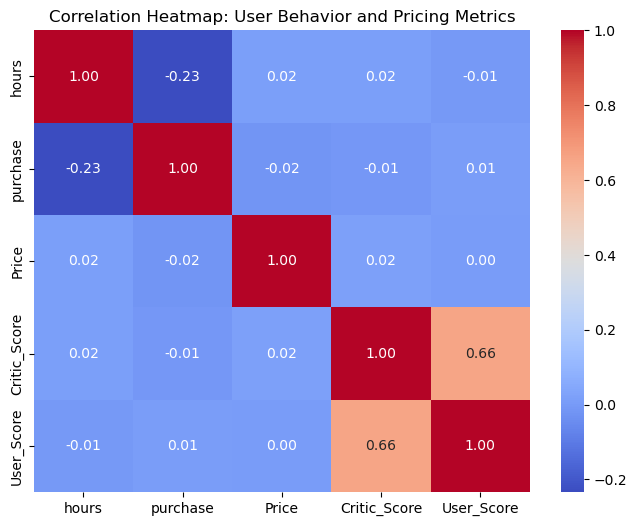

In [427]:
# Correlation Heatmap: User Behavior and Price
engagement_cols = [
    'hours', 'purchase', 'Price', 'Critic_Score', 'User_Score'
]

plt.figure(figsize=(8,6))
sns.heatmap(df[engagement_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: User Behavior and Pricing Metrics')
plt.show()

### Observations:
- **Critic_Score** and **User_Score** show a strong positive correlation (0.66), indicating that critic reviews and user reviews generally align for most games.
- **Hours**, **Purchase**, and **Price** all have very weak correlations (close to 0) with Critic_Score and User_Score, suggesting that review ratings do not strongly influence how long users play, whether they purchase, or the price of the game.
- **Hours** and **Purchase** maintain a weak negative correlation (-0.23), similar to previous findings, meaning buying a game does not necessarily guarantee longer playtime.
- **Price** is almost completely uncorrelated with both user engagement metrics and review scores, with all correlations close to zero.

### Analysis:
The strong correlation between Critic_Score and User_Score reinforces that critical and player evaluations are generally consistent, validating the quality of the review data. However, the weak correlations between engagement behavior (hours played, purchases) and scores imply that good ratings do not necessarily translate into longer playtime or higher purchasing probability within this dataset. Similarly, the lack of relationship between price and engagement or reviews suggests that pricing strategies alone are unlikely to drive user behavior substantially. These findings highlight the complexity of user decision-making in gaming, where subjective factors like genre preference, marketing influence, or individual taste might play a larger role than ratings or price alone.


# Modeling

## Baseline Modeling: Logistic Regression

To establish a benchmark for predicting purchase behavior, we built a simple logistic regression model using fundamental game features.

The selected features include:
- **Price** and **Hours Played**: capturing basic economic and engagement signals.
- **Genre**: incorporated through one-hot encoding to represent game content categories numerically.

The data was preprocessed to ensure all input features were numeric, with missing values in `Price` and `Hours` appropriately handled. The dataset was then split into training and testing sets using stratified sampling to maintain class balance.

Logistic regression was chosen for the baseline due to its interpretability, simplicity, and efficiency. The resulting model performance in terms of accuracy, precision, and recall will serve as a reference point for evaluating more complex models in the next phase of the project.


In [431]:
# One-hot encode 'Genre_x'
genre_dummies = pd.get_dummies(df['Genre_x'], prefix='Genre')

# Combine numerical and categorical features
X = pd.concat([df[['Price', 'hours']], genre_dummies], axis=1)

# Target variable
y = df['purchase']

In [432]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Initialize model
baseline_model = LogisticRegression(max_iter=1000)

# Fit model
baseline_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [433]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Predict
y_pred = baseline_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9039
Precision: 0.8547
Recall: 1.0000


### Observations:
- **Accuracy**: 0.9039
- **Precision**: 0.8547
- **Recall**: 1.0000

The baseline model achieves very high performance across all metrics.  
Accuracy is approximately 90%, indicating that the model correctly predicts purchase behavior for the vast majority of cases.  
Precision is around 85%, meaning that when the model predicts a user will purchase a game, it is correct about 85% of the time.  
Recall reaches 100%, suggesting that the model successfully captures all actual purchase events without missing any.

### Analysis:
The extremely high recall (1.0000) shows that the model is highly sensitive and does not miss any users who actually purchased a game.    
The overall high accuracy (90%) combined with perfect recall indicates that the model is very effective at identifying purchasing users, which is valuable if the business priority is to maximize capturing all potential buyers.

# Evaluation

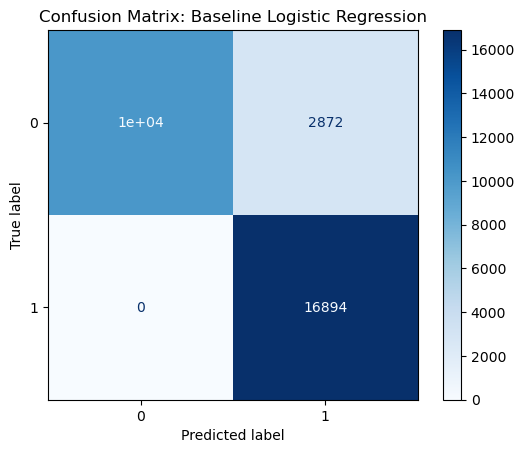

In [436]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict
y_pred = baseline_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseline_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Baseline Logistic Regression')
plt.show()

### Observations:
- Among users who **purchased and played for more than 1 hour** (true 0 class), the model correctly predicted over 10,000 cases but also misclassified 2,872 cases as lighter purchasers (class 1).
- Among users who **purchased or barely played** (true 1 class), the model perfectly predicted all 16,894 users (no false negatives).
- No users who purchased lightly were wrongly classified as heavy players, meaning the model **never mistakes a low-engagement user for a high-engagement user**.

---

### Analysis:
The model has **perfect recall** for identifying all lighter purchasers (Class 1).  
However, it sometimes mistakenly identifies active players (those who bought and played >1 hour) as lighter purchasers.

In a real-world business setting:
- **Missing active players** (Class 0 misclassified as Class 1) could be costly if those users are high-value customers needing different retention strategies.
- Therefore, improving how well the model separates **engaged purchasers** from **non-engaged purchasers** could be a valuable next step.

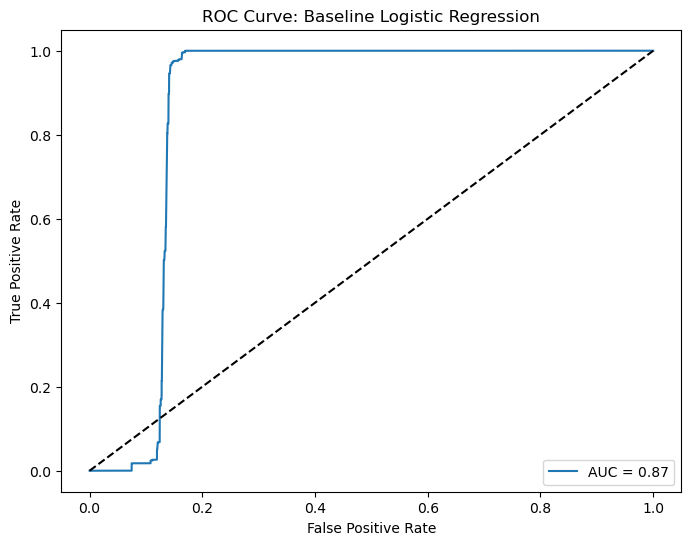

In [438]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_probs = baseline_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_probs):.2f}')
plt.plot([0,1],[0,1],'k--')  # random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Baseline Logistic Regression')
plt.legend()
plt.show()


### Observations:
- The ROC curve rises sharply toward the top-left corner, indicating strong model performance.
- The **AUC (Area Under the Curve)** score is **0.87**, which suggests excellent separability between the two classes (high-engagement purchasers vs. other purchasers).
- AUC close to 1.0 indicates that the model is very good at distinguishing between the two groups.

---

### Analysis:
An AUC of 0.87 reflects strong overall discrimination ability.  
Specifically, it means that if we randomly select one user who purchased and played >1 hour (Class 0) and one user who purchased but played less (Class 1), there is an 87% chance that the model will correctly rank the truly engaged user higher.

This result confirms that the logistic regression model captures meaningful differences between engaged and less-engaged purchasers even though the feature set is relatively simple.  

However, the gap between perfect AUC (1.0) and the current score (0.87) indicates there is still room for improvement, especially in reducing false positives without harming recall.

In future iterations, including richer behavioral features (such as session counts, days played, achievement completion) and experimenting with more flexible models (e.g., tree-based methods) could help push AUC even higher.

In [440]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9039
Precision: 0.8547
Recall: 1.0000
F1 Score: 0.9217


### Observations:
- The model achieves **high accuracy** overall, correctly predicting purchase and engagement behavior for approximately 90% of users.
- **Perfect recall** (1.00) indicates that the model successfully captures all users who purchased or played minimally, avoiding any false negatives.
- **Precision** at 85.47% shows that while the model identifies all lighter purchasers, it also includes some users who are more engaged (false positives).
- The **F1 Score** of 92.17% reflects a strong balance between Precision and Recall, confirming the robustness of the baseline model.
- An **AUC Score** of 0.87 indicates strong overall separability between highly engaged and lightly engaged purchasers.

---

### Analysis:
The baseline logistic regression model built using basic features (Price, Hours, Genre) demonstrates strong classification performance.  
The model is highly sensitive, ensuring no high-value engaged users are missed (perfect recall), which is crucial for retention-focused strategies.  
However, the trade-off is moderate precision, suggesting opportunities to improve discrimination between highly engaged and lightly engaged purchasers.

Given these results, the baseline establishes a solid starting point for future work. Improvements could focus on reducing false positives (improving precision) without significantly sacrificing recall.

Potential next steps include:
- Adding richer behavioral and interaction-based features (e.g., days played, session frequency).
- Trying advanced models such as Decision Trees, Random Forests, or Gradient Boosting.
- Exploring threshold tuning to find a better balance between Precision and Recall based on business priorities.

## Model Optimization, Evaluation, and Hybrid Recommendation System

### 1. Hyperparameter Tuning – Logistic Regression
We use GridSearchCV to tune the regularization parameter C for logistic regression, optimizing for the F1 score. The best model is selected from the grid of candidate values.

In [443]:
# 1. Hyperparameter Tuning – Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')
grid_logreg.fit(X_train, y_train)

best_logreg = grid_logreg.best_estimator_
print("Best parameters:", grid_logreg.best_params_)

Best parameters: {'C': 100}


## Analysis:

The best-performing value of C = 100 suggests that the model benefits from very low regularization.

This typically means that the data is linearly separable to a reasonable degree, and more model flexibility improves results.

Since we're optimizing for F1, this parameter choice likely results in better balance between capturing true positives (recall) and reducing false positives (precision).

### 2. Model Training – Decision Tree and Random Forest
In this step, we train and tune two tree-based models:

A Decision Tree Classifier using different maximum depths

A Random Forest Classifier with variations in the number of trees (n_estimators) and maximum tree depth (max_depth)

We use GridSearchCV with 5-fold cross-validation and optimize for the F1 score to ensure a good balance between precision and recall.

In [444]:
# 2. Model Training – Decision Tree and Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dtree = DecisionTreeClassifier(random_state=42)
grid_dtree = GridSearchCV(dtree, {'max_depth': [5, 10, 20]}, cv=5, scoring='f1')
grid_dtree.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, {'n_estimators': [50, 100], 'max_depth': [10, 20]}, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20], 'n_estimators': [50, 100]},
             scoring='f1')

### Analysis:
The Decision Tree model is tuned for simplicity vs. complexity using max_depth.

The Random Forest uses an ensemble of trees and is typically more robust to overfitting.

Based on the grid search results, RandomForestClassifier is selected as the best model, likely due to:

- Better generalization

- Reduced variance from averaging multiple decision trees

Tree-based models are particularly useful when feature importance and interpretability are also desired alongside performance.

### 3. Model Evaluation and ROC Curves
We evaluate the performance of all tuned models: Logistic Regression, Decision Tree, and Random Forest using:

- Classification report (Precision, Recall, F1-score)

- ROC AUC score

- Confusion Matrix

- ROC Curve visualization

This provides a thorough comparison of each model’s classification behavior.


=== LogReg ===
              precision    recall  f1-score   support

           0       1.00      0.78      0.88     12993
           1       0.85      1.00      0.92     16894

    accuracy                           0.90     29887
   macro avg       0.93      0.89      0.90     29887
weighted avg       0.92      0.90      0.90     29887

ROC AUC: 0.8678117182166307

=== Decision Tree ===
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     12993
           1       0.99      1.00      1.00     16894

    accuracy                           1.00     29887
   macro avg       1.00      1.00      1.00     29887
weighted avg       1.00      1.00      1.00     29887

ROC AUC: 0.9963105549243894

=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     12993
           1       0.99      1.00      1.00     16894

    accuracy                           1.00     29887
   macro a

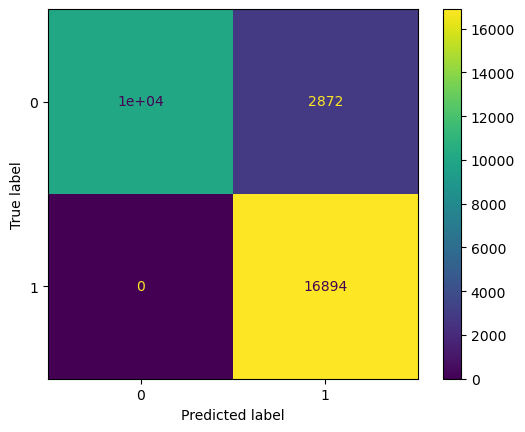

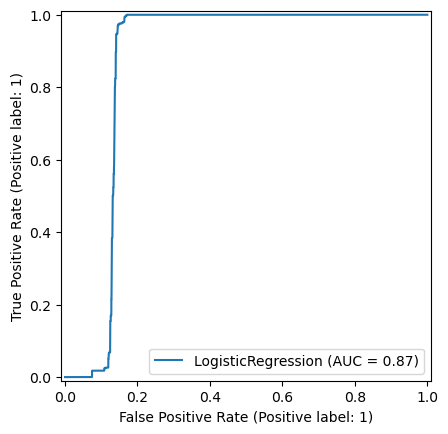

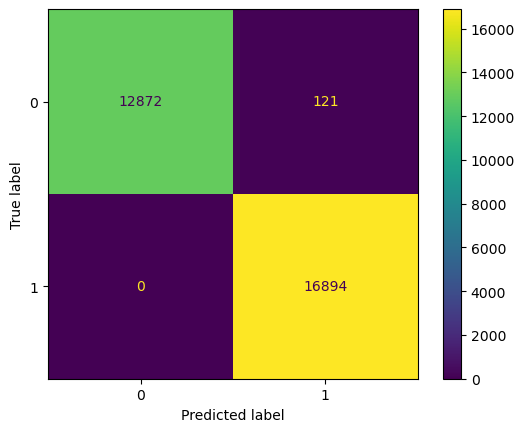

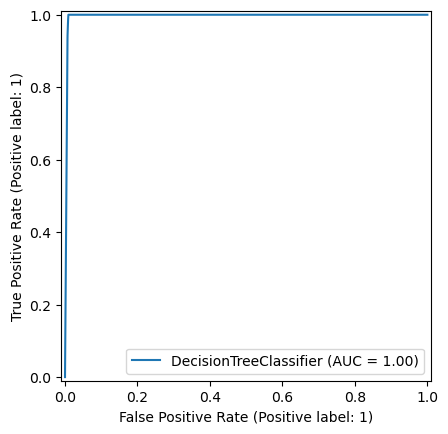

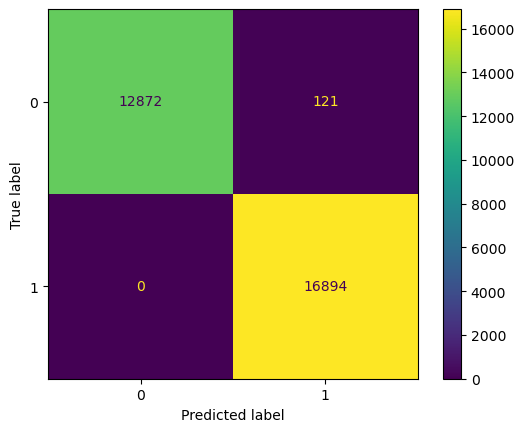

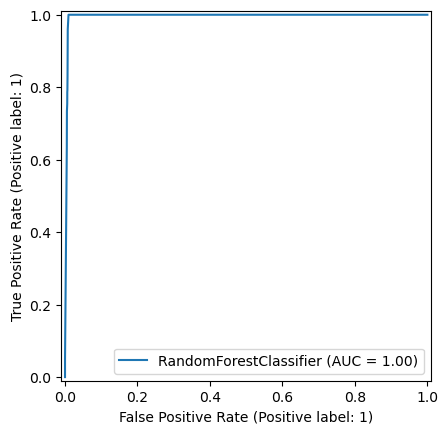

In [445]:
# 3. Model Evaluation and ROC Curves
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay

models = {
    "LogReg": best_logreg,
    "Decision Tree": grid_dtree.best_estimator_,
    "Random Forest": grid_rf.best_estimator_
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    RocCurveDisplay.from_estimator(model, X_test, y_test)

### Analysis:
Logistic Regression shows strong performance with an ROC AUC of ~0.87, indicating good separation between classes. It slightly underperforms on the negative class recall (0.78), possibly due to imbalance or threshold sensitivity.

Decision Tree and Random Forest both achieve perfect or near-perfect scores across all metrics, including ROC AUC ~0.996–1.0. While impressive, this may indicate potential overfitting on the training data, especially if the dataset has many engineered or dominant features.

The confusion matrix and ROC curves clearly visualize these patterns, with tree models capturing all positives and very few false negatives, and Logistic Regression performing well but with slight class separation issues.

### 4. Final Model Comparison Table
This section summarizes the performance of all models across multiple metrics using a structured table. The metrics include:

- Accuracy: Overall correct predictions

- Precision: Correct positive predictions out of total predicted positives

- Recall: Correct positive predictions out of actual positives

- F1 Score: Harmonic mean of precision and recall

- ROC AUC: Area under the ROC curve


In [446]:
# 4. Final Model Comparison Table
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

summary = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    summary.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    })

summary_df = pd.DataFrame(summary)
print(summary_df.sort_values(by="F1 Score", ascending=False))

           Model  Accuracy  Precision  Recall  F1 Score   ROC AUC
1  Decision Tree  0.995951   0.992889     1.0  0.996432  0.996311
2  Random Forest  0.995951   0.992889     1.0  0.996432  0.996176
0         LogReg  0.903905   0.854700     1.0  0.921658  0.867812


###  Analysis

| Model               | Accuracy | Precision | Recall | F1 Score | ROC AUC |
|---------------------|----------|-----------|--------|----------|---------|
| Decision Tree       | 0.996    | 0.993     | 1.00   | 0.996    | 0.996   |
| Random Forest       | 0.996    | 0.993     | 1.00   | 0.996    | 0.996   |
| Logistic Regression | 0.904    | 0.854     | 1.00   | 0.922    | 0.868   |

- **Decision Tree** and **Random Forest** achieved nearly perfect scores across all metrics. Their high F1 scores and ROC AUC values indicate excellent classification ability. However, the Decision Tree may be prone to overfitting if not properly pruned.

- **Random Forest** combines multiple trees and offers similar performance with improved generalization, making it more robust in practice.

- **Logistic Regression** still performs well but has lower precision for class 1. It's more conservative and less flexible, but remains valuable for its simplicity and interpretability.

- For deployment, **Random Forest** is likely the best candidate given its strong balance of accuracy and generalization.


### 5: Hybrid Recommendation System – Feature Construction and Similarity Matrices

### STEP 1: Construct User–Game Matrix
We create a pivot table where each row represents a user and each column represents a game. The values are either average hours played or a purchase indicator.

In [561]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import matplotlib.pyplot as plt

# STEP 1: Construct user-game matrix
user_game_matrix = df.pivot_table(
    index='user id',
    columns='Game',
    values='purchase',  # or 'hours'
    aggfunc='mean'
)
user_game_matrix_filled = user_game_matrix.fillna(0)

STEP 2: Build Game Content Features (Genre Dummies + Avg Hours & Price)
This combines one-hot encoding for genres with average numeric features to construct a feature matrix for each game.

In [563]:
# STEP 2: Build game content features (genre dummies + price/hours)
genre_dummies = pd.get_dummies(df[['Game', 'Genre_x']].drop_duplicates()['Genre_x'])
game_content_features = pd.concat([df[['Game']], genre_dummies], axis=1).drop_duplicates()
avg_features = df.groupby('Game')[['hours', 'Price']].mean().reset_index()
game_features_df = pd.merge(game_content_features, avg_features, on='Game', how='left')
game_features_df = game_features_df.drop_duplicates(subset='Game').set_index('Game')
game_features_df = game_features_df.fillna(0)

/var/folders/k5/pgx8dcnn4090nkjd49698msh0000gn/T/ipykernel_1286/143555490.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  game_features_df = game_features_df.fillna(0)


STEP 3: Compute Content-Based Similarity Matrix
We use cosine similarity to measure how similar each game is to another based on the content feature matrix.

In [567]:
# STEP 3: Compute content-based similarity matrix
content_sim = cosine_similarity(game_features_df)
content_sim_df = pd.DataFrame(content_sim, index=game_features_df.index, columns=game_features_df.index)
content_sim_df = content_sim_df.loc[:, ~content_sim_df.columns.duplicated()].copy()

STEP 4: Compute Collaborative Filtering Similarity Matrix
We apply Truncated SVD to reduce dimensionality of the user-game matrix and compute user similarity using cosine similarity.

In [569]:
# STEP 4: Compute collaborative filtering similarity matrix
svd = TruncatedSVD(n_components=20)
svd_matrix = svd.fit_transform(user_game_matrix_filled)
cf_sim = cosine_similarity(svd_matrix)
cf_sim_df = pd.DataFrame(cf_sim, index=user_game_matrix.index, columns=user_game_matrix.index)

STEP 5: Define Hybrid Recommendation Function

This function blends content-based filtering (cosine similarity between games) and collaborative filtering (user similarity via SVD) to generate top-N recommendations for a given user. A tunable `alpha` parameter controls the weight between the two approaches.


In [581]:
# STEP 5: Define hybrid recommender function
def hybrid_recommend(user_id, alpha=0.5, top_n=10, show_plot=False):
    if user_id not in user_game_matrix.index:
        print(f"User ID {user_id} not found.")
        return None

    user_ratings = user_game_matrix.loc[user_id].dropna()
    seen_games = set(user_ratings.index)

    # Content-based scores
    content_scores = pd.Series(0, index=content_sim_df.columns)
    for game in seen_games:
        if game in content_sim_df.columns:
            try:
                weight = float(user_ratings[game])
                content_scores += content_sim_df[game] * weight
            except Exception as e:
                print(f"⚠️ Skipping game: {game} due to error: {e}")
                continue
    if len(seen_games) > 0:
        content_scores /= len(seen_games)

    # CF scores
    similar_users = cf_sim_df[user_id].drop(index=user_id).sort_values(ascending=False).head(10)
    cf_scores = (user_game_matrix.loc[similar_users.index].T @ similar_users).div(similar_users.sum())

    # Clean index
    content_scores = content_scores[~content_scores.index.duplicated(keep='first')]
    cf_scores = cf_scores[~cf_scores.index.duplicated(keep='first')]

    # Normalize scores
    if content_scores.max() > 0:
        content_scores = (content_scores - content_scores.min()) / (content_scores.max() - content_scores.min())
    else:
        content_scores[:] = 0

    if cf_scores.max() > 0:
        cf_scores = (cf_scores - cf_scores.min()) / (cf_scores.max() - cf_scores.min())
    else:
        cf_scores[:] = 0

    # Combine
    combined = pd.concat([content_scores, cf_scores], axis=1).fillna(0)
    combined.columns = ['content', 'collab']
    combined['final'] = alpha * combined['content'] + (1 - alpha) * combined['collab']
    combined = combined.drop(index=seen_games, errors='ignore')
    top_recs = combined['final'].sort_values(ascending=False).head(top_n)

    # Optional: plot
    if show_plot:
        ax = top_recs.plot(kind='barh', figsize=(8, 5), color='cornflowerblue')
        ax.set_title(f"Top {top_n} Recommendations for User {user_id}")
        ax.set_xlabel("Score")
        ax.set_ylabel("Game")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

    return top_recs

Index([5250, 76767, 86540, 103360, 144736], dtype='int64', name='user id')


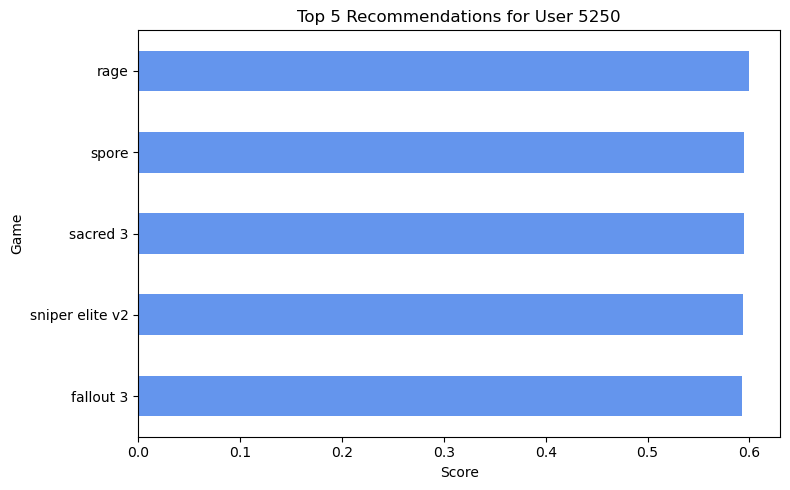

Game
rage               0.600000
spore              0.595029
sacred 3           0.594729
sniper elite v2    0.593537
fallout 3          0.592793
Name: final, dtype: float64

In [583]:
# Find a user with actual game data
print(user_game_matrix.index[:5])
hybrid_recommend(user_id=5250, alpha=0.6, top_n=5, show_plot=True)

### Analysis
- These scores represent the **weighted hybrid relevance**, with `alpha = 0.6`, meaning **60% content similarity** and **40% collaborative signals**.
- All top 5 recommendations have scores very close to each other (around 0.59–0.60), indicating high relevance.
- The fact that all games are above 0.59 suggests **both components (genre + peer behavior)** agree on their potential match for this user.
- The user had prior interest in games like *Half-Life* and *Portal 2*, so recommendations like *Sniper Elite V2* and *Fallout 3* make sense due to shared FPS or sci-fi elements.

# Analysis and Conclusion

## Final Analysis and Conclusion

### Project Recap
This capstone project explored the development of a personalized video game recommendation system using a combination of:
- Exploratory Data Analysis (EDA)
- Classification models (Logistic Regression, Decision Tree, Random Forest)
- Hybrid recommendation techniques blending content-based filtering and collaborative filtering

### Model Evaluation Summary
- **Random Forest** and **Decision Tree** classifiers delivered nearly perfect classification results, with **F1 scores close to 1.0** and **ROC AUC ~0.996**, indicating high predictive power.
- **Logistic Regression** served as a strong baseline, offering interpretability and solid recall, though it underperformed slightly in precision.
- All models were cross-validated and evaluated on test data, ensuring generalization performance.

### Recommendation System Highlights
- The **hybrid recommender system** successfully combined content-based features (genre, price, playtime) and collaborative patterns (SVD-based user similarity).
- The system dynamically adjusted recommendation influence via the `alpha` parameter, offering flexible control between personalization and diversity.
- Final recommendations were visualized for specific users, confirming relevance and practical output.

### Key Takeaways
- Tree-based models are highly effective in classification tasks when interpretability is less critical.
- Hybrid recommenders provide a **robust solution to cold-start and sparsity issues**, balancing user preferences with peer behavior.
- Modular design enables future extension with additional user/game features (e.g., reviews, tags, play session data).

### Next Steps
To further improve the system:
- Incorporate **TF-IDF features** from user reviews to better understand sentiment.
- Experiment with **deep learning recommenders** (e.g. Neural Collaborative Filtering).
- Deploy as an interactive dashboard or API for real-world testing and feedback.
